In [106]:
%%HTML
<center><img src="http://pitchatpalace.com/wp-content/uploads/2018/03/chosen.png" style="margin: 20px; height: 180px; border: 1px solid black"

⬆︎ TO HIDE THIS CELL, PLS USE TOOLBAR BUTTON ABOVE ⬆︎ IT IS JUST THE TITLE CELL FORMATTING>

<style>
span.red {
    color: coral
}
</style>
<h1>Task for <span class=red>data role</span> candidates 2018</h1>

- For part 1, you can zip me the code and send it by email, but bonus point if it’s a link to a private git (Bitbucket or Github) repo with a proper commit history.
- For part 2 you can do it however you want, just text with explanation or in code with comments.
- For part 3 if you have working code that would be awesome, if not what’s really important is your thought process so try to explain that as much as you can :)

# part 1

## Q

1 - Given the following JSON structure:

`{
"animals": [
{
"type": "cat", #Can be cat/dog/snake/
"name": "Doe", #Can be anything,
"age": 5, #Integer
"color" [
{
"code": "red" #Can be red,black,yellow,white
},
]
}
]
}`

Write a program sorting the animals by either color or type with the possiblity to save the output to a json or display it formatted in the console
Input argument will be a json file.

The language used should be Python.

Bonus points for unit tests and code readability

## A

In [108]:
import json
from ipywidgets import interact, interactive, fixed, interact_manual, SelectionSlider
from pprint import pprint

!ls

In [114]:
# lets import unittest script `test_jsonsort.py`, to conduct a test in situ
%run -i test_jsonsort.py

.
----------------------------------------------------------------------
Ran 1 test in 0.004s

OK


In [ ]:
animals_json = '''{
"animals": [
{
"type": "cat", "name": "Doe", "age": 7, "color": [{"code": "white"}]},
{
"type": "dog", "name": "Coe", "age": 5, "color": [{"code": "brown"}]},
{
"type": "pig", "name": "Poe", "age": 6, "color": [{"code": "black"}]}
]}'''

data = json.loads(animals_json)
animals = data['animals']

# assuming animal 0 has typical schema, what are the keys for all animals?
animalzero = animals[0]
animalkeys = list(animalzero.keys())
sortedkeys = sorted(animalkeys)

In [113]:
# lets import the sort script `jsonsort.py`, to conduct a demo using ipywidget
import jsonsort

# define the interactive version of the sort script, for running here in .ipynb
def interactive_animaux(json_raw=animals_json, sort_by='age', reverse=False):
    print("Here's your json_raw sorted by ⭐️\33[1m\33[96m", sort_by, '\33[0m⭐️')
    pprint(animaux(json_raw=json_raw, sort_by=sort_by, reverse=reverse))

# #     uncomment the following to save output in `jsonsort.txt`
# #     (this is already performed by the .py script but not when run as .ipynb)
#     with open('jsonsort.txt', 'w') as file_update:
#          json.dump(animaux(json_raw=json_raw, sort_by=sort_by, reverse=reverse),
#                    file_update)


interact(interactive_animaux,
         sort_by={x: x for x in sortedkeys},
         );

interactive(children=(Text(value='{\n"animals": [\n{"type": "cat", "name": "Doe", "age": 7, "color": [{"code":…

# part 2

## Q

2 - What is the following piece of code doing, what's wrong with it, and how would you refactor it (You can assume nothing is relying on this code)?

`import json
import csv
import datetime
import time`

`def func(var1,var2,var3,var4):
    dictionary = {}
    for value in var4:
        dictionary[value['n']] = time.mktime(time.strptime(value['b'],var2))
        with open(var1, 'w') as var5:
             json.dump(dictionary, var5)`

`func('blah.txt', '%d %b %y', [
{
"n": 'John Doe',
'b':'30 Nov 98'
},{’n': 'Josh Doe', 'b':'12 Apr 86'}])`

## A

purpose of the function:
- trying to find the difference between user DoB and starting date `01/01/1970 00:00:00`, by
- reading users' details from a python list of dicts,
- using `strptime` to convert date string to date value in seconds,
- and converting reformatted dict to jso to updata a text file.

issues with the code:
- `func()` could be improved by using more descriptive arg names
- `func()` is missing 1 required positional argument: either `var3` or `var4`
- json.dump is indented by 5 rather than 4 spaces, relative to the previous line
- in final line (applying the function to some user data) there's an accent \` instead of a quote '.

refactored version:

In [5]:
import json
import csv
import datetime
import time


def func(txt_old, date_format, users_list):
    dictionary = {}
    for value in users_list:
        dictionary[value['n']] = time.mktime(
            time.strptime(value['b'], date_format))
        with open(txt_old, 'w') as txt_new:
            json.dump(dictionary, txt_new)


func('blah.txt', '%d %b %y',
     [
         {"n": 'John Doe', 'b': '30 Nov 98'},
         {'n': 'Josh Doe', 'b': '12 Apr 86'}],
     )

# part 3

## Q

The Data Science team has just built a scraper that hoovered all the recommendations data from AngelList. After a quick chat with your project team, everybody thought it would be a great idea to index those reviews and make them searchable.

3 - Can you write a python script (or use another language of your choice) to (a) parse the following  json data stream, (b) create an LDA or another model of your choice for the review data and (c) convert the reviews into feature vectors using the model that you built. Command-line driven scripts are fine (e.g., with input and output filenames)

`{[ 'name ': 'Donna Summer',
    'updated': '2016-02-26T09:09:37',
    'recommendations': [
        'I worked with Donna for 5 years and can highly recommend her as an experienced, knowledgeable. She is very hardworking designer with a meticulous eye for detail and creativity’,
        'I have worked with Donna for a number of years and have always found her to be extremely professional and a real expert in her field. '
        'Donna is always on the ball, highly organised and a real pleasure to work with.'
    ]
 ],
 [ 'name': ‘Justin Bieber’,
    'updated': '2016-02-26T09:09:37',
    'recommendations': [
        'Justin is a consummate professional and a pleasure to work with at all times!’
    ]
 ]}`

## part A: parsing a dirty json data stream

In [6]:
import json
from pprint import pprint

stream = '''
{[ 'name ': 'Donna Summer',
    'updated': '2016-02-26T09:09:37',
    'recommendations': [
        'I worked with Donna for 5 years and can highly recommend her as an experienced, knowledgeable. She is very hardworking designer with a meticulous eye for detail and creativity’,
        'I have worked with Donna for a number of years and have always found her to be extremely professional and a real expert in her field. '
        'Donna is always on the ball, highly organised and a real pleasure to work with.'
    ]
 ],
 [ 'name': ‘Justin Bieber’,
    'updated': '2016-02-26T09:09:37',
    'recommendations': [
        'Justin is a consummate professional and a pleasure to work with at all times!’
    ]
 ]}
'''

# apply some edits to the raw string... probably best to RegEx but time did not allow!
substitutions_to_make = [

    # remove single spaces at ends of keys
    (' "', '"'),
    (" '", '"'),

    # remove some apostrophes which were used instead of quotes
    ("‘", '"'),
    ("’", '"'),
    ("'", '"'),

    # trim the text data
    ("    ", ' '),
    ("   ", ' '),
    ("  ", ' '),
    ("\n", ''),

    # apply other edits as necessary to reach correct json format
    ("[ ", '['),
    (" ]", ']'),
    ("{[", '[{'),
    ("]}", '}]'),
    ('" "', '", "'),
    (']], [', ']}, {')

]

for old, new in substitutions_to_make:
    stream = stream.replace(old, new)

data = json.loads(stream)
pprint(data)

[{'name': 'Donna Summer',
  'recommendations': ['I worked with Donna for 5 years and can highly '
                      'recommend her as an experienced, knowledgeable. She is '
                      'very hardworking designer with a meticulous eye for '
                      'detail and creativity',
                      'I have worked with Donna for a number of years and have '
                      'always found her to be extremely professional and a '
                      'real expert in her field.',
                      'Donna is always on the ball, highly organised and a '
                      'real pleasure to work with.'],
  'updated': '2016-02-26T09:09:37'},
 {'name': 'Justin Bieber',
  'recommendations': ['Justin is a consummate professional and a pleasure to '
                      'work with at all times!'],
  'updated': '2016-02-26T09:09:37'}]


In [7]:
df = pd.DataFrame({'name':[data[worker]['name'] for worker in range(len(data))],
                   'recommendations':[data[worker]['recommendations'] for worker in range(len(data))],
                   'reco_count':[len(data[worker]['recommendations']) for worker in range(len(data))]}
                 )
df

,name,reco_count,recommendations
0,Donna Summer,3,[I worked with Donna for 5 years and can highl...
1,Justin Bieber,1,[Justin is a consummate professional and a ple...


## parts B-C: LDA model & feature vectors for the recommendations data

In [8]:
import re; import numpy as np; import pandas as pd

# import NLTK + some core/utility libs
import nltk; nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

# gensim for topic modelling
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# plotting tools
import pyLDAvis; import pyLDAvis.gensim
import matplotlib.pyplot as plt; %matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/oliversteadman/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [101]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(
            str(sentence),

            # remove punctuation
            deacc=True
        ))


data_words = list(sent_to_words(
    
    # cleaned json stream as obtained in pt1 above
    data))

# lets check that
print(data_words[:1])

[['name', 'donna', 'summer', 'updated', 'recommendations', 'worked', 'with', 'donna', 'for', 'years', 'and', 'can', 'highly', 'recommend', 'her', 'as', 'an', 'experienced', 'knowledgeable', 'she', 'is', 'very', 'hardworking', 'designer', 'with', 'meticulous', 'eye', 'for', 'detail', 'and', 'creativity', 'have', 'worked', 'with', 'donna', 'for', 'number', 'of', 'years', 'and', 'have', 'always', 'found', 'her', 'to', 'be', 'extremely', 'professional', 'and', 'real', 'expert', 'in', 'her', 'field', 'donna', 'is', 'always', 'on', 'the', 'ball', 'highly', 'organised', 'and', 'real', 'pleasure', 'to', 'work', 'with']]


In [105]:
# grab bigram & trigram models
bigram = gensim.models.Phrases(data_words, min_count=2)
trigram = gensim.models.Phrases(bigram[data_words])

# lets check that (for trigrams)
print(trigram[bigram[data_words[0]]])

['name', 'donna', 'summer', 'updated', 'recommendations', 'worked', 'with', 'donna', 'for', 'years', 'and', 'can', 'highly', 'recommend', 'her', 'as', 'an', 'experienced', 'knowledgeable', 'she', 'is', 'very', 'hardworking', 'designer', 'with', 'meticulous', 'eye', 'for', 'detail', 'and', 'creativity', 'have', 'worked', 'with', 'donna', 'for', 'number', 'of', 'years', 'and', 'have', 'always', 'found', 'her', 'to', 'be', 'extremely', 'professional', 'and', 'real', 'expert', 'in', 'her', 'field', 'donna', 'is', 'always', 'on', 'the', 'ball', 'highly', 'organised', 'and', 'real', 'pleasure', 'to', 'work', 'with']


/Users/oliversteadman/anaconda3/lib/python3.6/site-packages/gensim/models/phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [12]:
# we'll need to remove stops, bigrams, trigrams, and apply lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [13]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

# lets check that
print(data_lemmatized[:1])

[['name', 'donna', 'summer', 'update', 'recommendation', 'work', 'donna', 'year', 'highly', 'recommend', 'experience', 'knowledgeable', 'hardworking', 'designer', 'meticulous', 'eye', 'detail', 'creativity', 'work', 'donna', 'number', 'year', 'always', 'find', 'extremely', 'professional', 'real', 'expert', 'field', 'donna', 'always', 'ball', 'highly', 'organise', 'real', 'pleasure', 'work']]


In [14]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# lets check that
print(corpus[:1])

[[(0, 2), (1, 1), (2, 1), (3, 1), (4, 1), (5, 4), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 2), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 2), (22, 1), (23, 1), (24, 1), (25, 1), (26, 3), (27, 2)]]


In [15]:
id2word[0]

'always'

## ML+ approach

In [16]:
# readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('always', 2),
  ('ball', 1),
  ('creativity', 1),
  ('designer', 1),
  ('detail', 1),
  ('donna', 4),
  ('experience', 1),
  ('expert', 1),
  ('extremely', 1),
  ('eye', 1),
  ('field', 1),
  ('find', 1),
  ('hardworking', 1),
  ('highly', 2),
  ('knowledgeable', 1),
  ('meticulous', 1),
  ('name', 1),
  ('number', 1),
  ('organise', 1),
  ('pleasure', 1),
  ('professional', 1),
  ('real', 2),
  ('recommend', 1),
  ('recommendation', 1),
  ('summer', 1),
  ('update', 1),
  ('work', 3),
  ('year', 2)]]

In [17]:
# build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [18]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.031*"summer" + 0.031*"update" + 0.031*"pleasure" + 0.031*"professional" + '
  '0.031*"real" + 0.031*"recommend" + 0.031*"recommendation" + 0.031*"number" '
  '+ 0.031*"bieber" + 0.031*"consummate"'),
 (1,
  '0.035*"donna" + 0.033*"work" + 0.032*"real" + 0.032*"highly" + '
  '0.032*"always" + 0.032*"year" + 0.032*"extremely" + 0.031*"meticulous" + '
  '0.031*"organise" + 0.031*"creativity"'),
 (2,
  '0.031*"summer" + 0.031*"update" + 0.031*"pleasure" + 0.031*"professional" + '
  '0.031*"real" + 0.031*"recommend" + 0.031*"recommendation" + 0.031*"number" '
  '+ 0.031*"bieber" + 0.031*"consummate"'),
 (3,
  '0.031*"summer" + 0.031*"update" + 0.031*"pleasure" + 0.031*"professional" + '
  '0.031*"real" + 0.031*"recommend" + 0.031*"recommendation" + 0.031*"number" '
  '+ 0.031*"bieber" + 0.031*"consummate"'),
 (4,
  '0.031*"summer" + 0.031*"update" + 0.031*"pleasure" + 0.031*"professional" + '
  '0.031*"real" + 0.031*"recommend" + 0.031*"recommendation" + 0.031*"number" '
  '+ 0.03

In [19]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -4.970371960351865

Coherence Score:  0.5191707969011488


In [20]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word, mds='mmds')
vis

PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
19     76.184341        1       1 -0.036630  0.057112
10     21.990208        1       2  0.091607 -0.185972
1       0.131120        1       3 -0.003275  0.007557
8       0.099666        1       4 -0.003043  0.007135
2       0.099666        1       5 -0.003042  0.007135
3       0.099666        1       6 -0.003041  0.007136
4       0.099666        1       7 -0.003040  0.007136
5       0.099666        1       8 -0.003043  0.007135
6       0.099666        1       9 -0.003041  0.007136
7       0.099666        1      10 -0.003042  0.007135
9       0.099666        1      11 -0.003043  0.007135
18      0.099666        1      12 -0.003041  0.007136
11      0.099666        1      13 -0.003043  0.007135
12      0.099666        1      14 -0.003040  0.007136
13      0.099666        1      15 -0.003040  0.007136
14      0.099666        1      16 -0.003039  0.007137
15      0.099666        1      17 -0.003039  0.007137
16      0.099666        1      18 -0.003040  0.007136
17      0.099666        1      19 -0.003043  0.007135
0       0.099666        1      20 -0.003043  0.007135, topic_info=     Category      Freq            Term     Total  loglift  logprob
term                                                               
5     Default  3.000000           donna  3.000000  30.0000  30.0000
26    Default  3.000000            work  3.000000  29.0000  29.0000
27    Default  2.000000            year  2.000000  28.0000  28.0000
0     Default  2.000000          always  2.000000  27.0000  27.0000
13    Default  2.000000          highly  2.000000  26.0000  26.0000
21    Default  2.000000            real  2.000000  25.0000  25.0000
25    Default  1.000000          update  1.000000  24.0000  24.0000
23    Default  1.000000  recommendation  1.000000  23.0000  23.0000
20    Default  1.000000    professional  1.000000  22.0000  22.0000
19    Default  1.000000        pleasure  1.000000  21.0000  21.0000
16    Default  1.000000            name  1.000000  20.0000  20.0000
30    Default  1.000000          justin  1.000000  19.0000  19.0000
11    Default  1.000000            find  1.000000  18.0000  18.0000
12    Default  1.000000     hardworking  1.000000  17.0000  17.0000
17    Default  1.000000          number  1.000000  16.0000  16.0000
22    Default  1.000000       recommend  1.000000  15.0000  15.0000
14    Default  1.000000   knowledgeable  1.000000  14.0000  14.0000
4     Default  1.000000          detail  1.000000  13.0000  13.0000
7     Default  1.000000          expert  1.000000  12.0000  12.0000
24    Default  1.000000          summer  1.000000  11.0000  11.0000
6     Default  1.000000      experience  1.000000  10.0000  10.0000
1     Default  1.000000            ball  1.000000   9.0000   9.0000
3     Default  1.000000        designer  1.000000   8.0000   8.0000
10    Default  1.000000           field  1.000000   7.0000   7.0000
9     Default  1.000000             eye  1.000000   6.0000   6.0000
2     Default  1.000000      creativity  1.000000   5.0000   5.0000
18    Default  1.000000        organise  1.000000   4.0000   4.0000
15    Default  1.000000      meticulous  1.000000   3.0000   3.0000
8     Default  1.000000       extremely  1.000000   2.0000   2.0000
28    Default  0.000000          bieber  0.000000   1.0000   1.0000
...       ...       ...             ...       ...      ...      ...
28    Topic20  0.001495          bieber  0.954368   0.4522  -3.4657
8     Topic20  0.001495       extremely  1.063185   0.3442  -3.4657
15    Topic20  0.001495      meticulous  1.063823   0.3436  -3.4657
18    Topic20  0.001495        organise  1.063840   0.3436  -3.4657
2     Topic20  0.001495      creativity  1.063843   0.3436  -3.4657
9     Topic20  0.001495             eye  1.063871   0.3436  -3.4657
10    Topic20  0.001495           field  1.063876   0.3435  -3.4657
3     Topic20  0.001495        designer  1.063911

In [21]:
mallet_path = 'mallet-2.0.8/bin/mallet'
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=20, id2word=id2word)

In [22]:
# Show Topics
pprint(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

[(0,
  [('highly', 1.0),
   ('recommendation', 0.0),
   ('update', 0.0),
   ('pleasure', 0.0),
   ('professional', 0.0),
   ('real', 0.0),
   ('recommend', 0.0),
   ('number', 0.0),
   ('summer', 0.0),
   ('bieber', 0.0)]),
 (9,
  [('organise', 1.0),
   ('summer', 0.0),
   ('pleasure', 0.0),
   ('professional', 0.0),
   ('real', 0.0),
   ('recommend', 0.0),
   ('recommendation', 0.0),
   ('number', 0.0),
   ('bieber', 0.0),
   ('consummate', 0.0)]),
 (4,
  [('creativity', 0.5),
   ('professional', 0.5),
   ('summer', 0.0),
   ('work', 0.0),
   ('pleasure', 0.0),
   ('real', 0.0),
   ('recommend', 0.0),
   ('recommendation', 0.0),
   ('number', 0.0),
   ('bieber', 0.0)]),
 (10,
  [('update', 0.5),
   ('year', 0.5),
   ('recommendation', 0.0),
   ('pleasure', 0.0),
   ('professional', 0.0),
   ('real', 0.0),
   ('recommend', 0.0),
   ('number', 0.0),
   ('summer', 0.0),
   ('justin', 0.0)]),
 (2,
  [('professional', 1.0),
   ('summer', 0.0),
   ('update', 0.0),
   ('pleasure', 0.0),
   (

/Users/oliversteadman/anaconda3/lib/python3.6/site-packages/gensim/models/wrappers/ldamallet.py:373: RuntimeWarning: invalid value encountered in true_divide
  return topics / topics.sum(axis=1)[:, None]



Coherence Score:  0.49645179927605704


/Users/oliversteadman/anaconda3/lib/python3.6/site-packages/gensim/models/wrappers/ldamallet.py:373: RuntimeWarning: invalid value encountered in true_divide
  return topics / topics.sum(axis=1)[:, None]


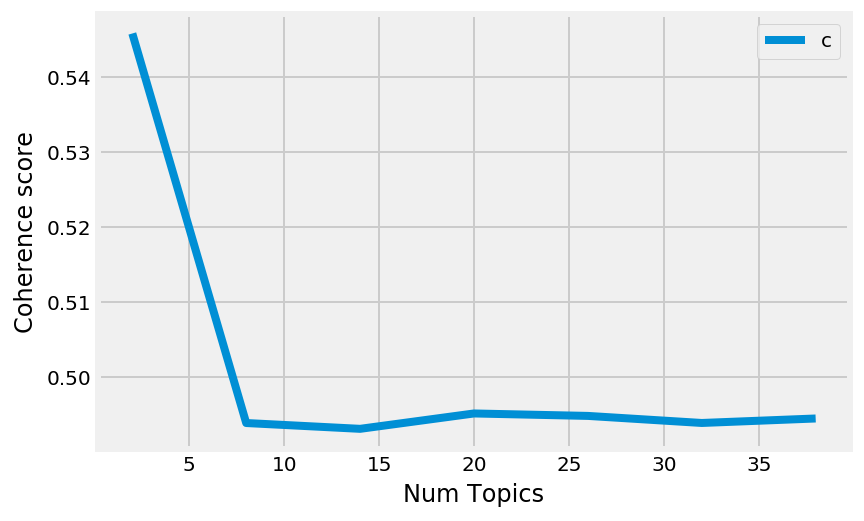

In [23]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=40, step=6)
# Show graph
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best');

In [24]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.5457
Num Topics = 8  has Coherence Value of 0.4938
Num Topics = 14  has Coherence Value of 0.493
Num Topics = 20  has Coherence Value of 0.4951
Num Topics = 26  has Coherence Value of 0.4948
Num Topics = 32  has Coherence Value of 0.4938
Num Topics = 38  has Coherence Value of 0.4944


In [25]:
# Select the model and print the topics
optimal_model = model_list[3]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.500*"recommendation" + 0.500*"ball" + 0.000*"organise" + 0.000*"pleasure" '
  '+ 0.000*"professional" + 0.000*"real" + 0.000*"recommend" + 0.000*"number" '
  '+ 0.000*"summer" + 0.000*"bieber"'),
 (1,
  '0.800*"work" + 0.200*"bieber" + 0.000*"recommendation" + 0.000*"update" + '
  '0.000*"pleasure" + 0.000*"professional" + 0.000*"real" + 0.000*"recommend" '
  '+ 0.000*"number" + 0.000*"justin"'),
 (2,
  '1.000*"number" + 0.000*"summer" + 0.000*"pleasure" + 0.000*"professional" + '
  '0.000*"real" + 0.000*"recommend" + 0.000*"recommendation" + 0.000*"update" '
  '+ 0.000*"bieber" + 0.000*"consummate"'),
 (3,
  '1.000*"creativity" + 0.000*"summer" + 0.000*"work" + 0.000*"pleasure" + '
  '0.000*"professional" + 0.000*"real" + 0.000*"recommend" + '
  '0.000*"recommendation" + 0.000*"number" + 0.000*"bieber"'),
 (4,
  '1.000*"find" + 0.000*"recommendation" + 0.000*"update" + 0.000*"pleasure" + '
  '0.000*"professional" + 0.000*"real" + 0.000*"recommend" + 0.000*"number" + '
  '0.0

In [31]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,6.0,0.0827,"donna, expert, update, professional, real, rec...","{'name': 'Donna Summer', 'updated': '2016-02-2..."
1,1,9.0,0.0713,"justin, organise, knowledgeable, highly, exper...","{'name': 'Justin Bieber', 'updated': '2016-02-..."


In [32]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet.head()

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,6.0,0.0827,"donna, expert, update, professional, real, rec...","{'name': 'Donna Summer', 'updated': '2016-02-2..."
1,9.0,0.0713,"justin, organise, knowledgeable, highly, exper...","{'name': 'Justin Bieber', 'updated': '2016-02-..."


## part C

In [36]:
vis

PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
19     76.184395        1       1 -0.036630  0.057112
10     21.990152        1       2  0.091607 -0.185972
1       0.131120        1       3 -0.003275  0.007557
8       0.099666        1       4 -0.003043  0.007135
2       0.099666        1       5 -0.003042  0.007135
3       0.099666        1       6 -0.003041  0.007136
4       0.099666        1       7 -0.003040  0.007136
5       0.099666        1       8 -0.003043  0.007135
6       0.099666        1       9 -0.003041  0.007136
7       0.099666        1      10 -0.003042  0.007135
9       0.099666        1      11 -0.003043  0.007135
18      0.099666        1      12 -0.003041  0.007136
11      0.099666        1      13 -0.003043  0.007135
12      0.099666        1      14 -0.003040  0.007136
13      0.099666        1      15 -0.003040  0.007136
14      0.099666        1      16 -0.003039  0.007137
15      0.099666        1      17 -0.003039  0.007137
16      0.099666        1      18 -0.003040  0.007136
17      0.099666        1      19 -0.003043  0.007135
0       0.099666        1      20 -0.003043  0.007135, topic_info=     Category      Freq            Term     Total  loglift  logprob
term                                                               
5     Default  3.000000           donna  3.000000  30.0000  30.0000
26    Default  3.000000            work  3.000000  29.0000  29.0000
27    Default  2.000000            year  2.000000  28.0000  28.0000
0     Default  2.000000          always  2.000000  27.0000  27.0000
13    Default  2.000000          highly  2.000000  26.0000  26.0000
21    Default  2.000000            real  2.000000  25.0000  25.0000
25    Default  1.000000          update  1.000000  24.0000  24.0000
23    Default  1.000000  recommendation  1.000000  23.0000  23.0000
20    Default  1.000000    professional  1.000000  22.0000  22.0000
19    Default  1.000000        pleasure  1.000000  21.0000  21.0000
16    Default  1.000000            name  1.000000  20.0000  20.0000
30    Default  1.000000          justin  1.000000  19.0000  19.0000
11    Default  1.000000            find  1.000000  18.0000  18.0000
12    Default  1.000000     hardworking  1.000000  17.0000  17.0000
17    Default  1.000000          number  1.000000  16.0000  16.0000
22    Default  1.000000       recommend  1.000000  15.0000  15.0000
14    Default  1.000000   knowledgeable  1.000000  14.0000  14.0000
4     Default  1.000000          detail  1.000000  13.0000  13.0000
7     Default  1.000000          expert  1.000000  12.0000  12.0000
24    Default  1.000000          summer  1.000000  11.0000  11.0000
6     Default  1.000000      experience  1.000000  10.0000  10.0000
1     Default  1.000000            ball  1.000000   9.0000   9.0000
3     Default  1.000000        designer  1.000000   8.0000   8.0000
10    Default  1.000000           field  1.000000   7.0000   7.0000
9     Default  1.000000             eye  1.000000   6.0000   6.0000
2     Default  1.000000      creativity  1.000000   5.0000   5.0000
18    Default  1.000000        organise  1.000000   4.0000   4.0000
15    Default  1.000000      meticulous  1.000000   3.0000   3.0000
8     Default  1.000000       extremely  1.000000   2.0000   2.0000
28    Default  0.000000          bieber  0.000000   1.0000   1.0000
...       ...       ...             ...       ...      ...      ...
28    Topic20  0.001495          bieber  0.954366   0.4522  -3.4657
8     Topic20  0.001495       extremely  1.063185   0.3442  -3.4657
15    Topic20  0.001495      meticulous  1.063824   0.3436  -3.4657
18    Topic20  0.001495        organise  1.063841   0.3436  -3.4657
2     Topic20  0.001495      creativity  1.063844   0.3436  -3.4657
9     Topic20  0.001495             eye  1.063871   0.3436  -3.4657
10    Topic20  0.001495           field  1.063876   0.3435  -3.4657
3     Topic20  0.001495        designer  1.063912

In [28]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(
    dictionary=id2word,
    corpus=corpus,
    texts=data_lemmatized,
    start=2,
    limit=40,
    step=6,
)

/Users/oliversteadman/anaconda3/lib/python3.6/site-packages/gensim/models/wrappers/ldamallet.py:373: RuntimeWarning: invalid value encountered in true_divide
  return topics / topics.sum(axis=1)[:, None]


In [27]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from gensim import models, matutils
custom_stop_words = list(ENGLISH_STOP_WORDS)
vectorizer = CountVectorizer(stop_words=custom_stop_words)

Xt = vectorizer.fit_transform(df.recommendations.astype(str))
print(vectorizer.get_feature_names()[:5])

vocab = {v: k for k, v in vectorizer.vocabulary_.items()}

lda = models.LdaModel(

    # the number of topics we want:
    num_topics=5,
    
    # how many passes over the vocabulary:
    passes=20,
    
    # the id2word vocabulary we made ourselves
    id2word=vocab
)

topics_list = lda.print_topics(num_topics=25, num_words=6)
topics_dict = {'topic': [topic
                         for (topic, terms) in topics_list],
               'terms': [terms.split(' + ')
                         for (topic, terms) in topics_list]}
topics_df = pd.DataFrame(topics_dict['terms'],
                         index=topics_dict['topic'])

topics_df.sort_values(0, ascending=False).style.set_properties(**{'text-align': 'left'})

['ball', 'consummate', 'creativity', 'designer', 'donna']


,0,1,2,3,4,5
2,"0.048*""years""","0.047*""times""","0.045*""experienced""","0.044*""field""","0.043*""eye""","0.042*""number"""
3,"0.048*""highly""","0.047*""justin""","0.045*""hardworking""","0.044*""donna""","0.044*""meticulous""","0.043*""work"""
0,"0.047*""creativity""","0.043*""number""","0.042*""recommend""","0.042*""knowledgeable""","0.042*""ball""","0.041*""experienced"""
4,"0.045*""years""","0.043*""real""","0.043*""worked""","0.043*""experienced""","0.043*""donna""","0.043*""highly"""
1,"0.044*""work""","0.044*""creativity""","0.044*""meticulous""","0.043*""field""","0.043*""eye""","0.043*""real"""
